In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df = pd.read_csv('/ProgramData/Microsoft/Windows/netflix1.csv')
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [7]:
df.shape

(8790, 10)

In [8]:
df.dtypes

show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object

In [9]:
df.drop(columns="show_id", inplace=True)

In [10]:
# There aren't null value
df.isnull().sum()

type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [11]:
df = df.dropna()

In [12]:
df['type'] = df['type'].astype('category')
df['release_year'] = df['release_year'].astype(int)
df['date_added'] = pd.to_datetime(df['date_added'])


In [13]:
df.dtypes

type                  category
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int32
rating                  object
duration                object
listed_in               object
dtype: object

In [14]:
duplicate = df[df.duplicated(subset=['title'], keep = False)]
print(duplicate)

         type   title            director   country date_added  release_year  \
393   TV Show   9-Feb           Not Given  Pakistan 2019-03-20          2018   
537   TV Show   9-Feb           Not Given  Pakistan 2019-03-20          2018   
2925    Movie  15-Aug  Swapnaneel Jayakar     India 2019-03-29          2019   
3285    Movie  22-Jul     Paul Greengrass    Norway 2018-10-10          2018   
4260    Movie  22-Jul     Paul Greengrass    Norway 2018-10-10          2018   
4261    Movie  15-Aug  Swapnaneel Jayakar     India 2019-03-29          2019   

     rating  duration                             listed_in  
393   TV-14  1 Season     International TV Shows, TV Dramas  
537   TV-14  1 Season     International TV Shows, TV Dramas  
2925  TV-14   124 min  Comedies, Dramas, Independent Movies  
3285      R   144 min                     Dramas, Thrillers  
4260      R   144 min                     Dramas, Thrillers  
4261  TV-14   124 min  Comedies, Dramas, Independent Movies  


In [15]:
no_dup = duplicate.drop_duplicates(subset= 'title' , keep='first')
df = pd.concat([no_dup, df.drop_duplicates(subset='title', keep = False)])
df

,type,title,director,country,date_added,release_year,rating,duration,listed_in
393,TV Show,9-Feb,Not Given,Pakistan,2019-03-20,2018,TV-14,1 Season,"International TV Shows, TV Dramas"
2925,Movie,15-Aug,Swapnaneel Jayakar,India,2019-03-29,2019,TV-14,124 min,"Comedies, Dramas, Independent Movies"
3285,Movie,22-Jul,Paul Greengrass,Norway,2018-10-10,2018,R,144 min,"Dramas, Thrillers"
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
...,...,...,...,...,...,...,...,...,...
8785,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV
8787,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV


In [16]:
movie =  df['type'].value_counts()['Movie'].sum()
print(movie)
show_tv =  df['type'].value_counts()['TV Show'].sum()
print(show_tv)

6124
2663


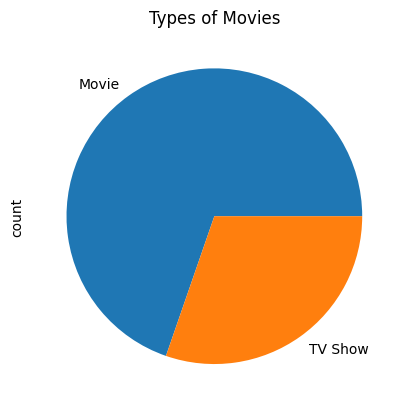

In [17]:
type_counts = df['type'].value_counts()

type_counts.plot(kind='pie')
plt.title('Types of Movies')
plt.show()

In [18]:
df['country'].value_counts()

country
United States     3240
India             1056
United Kingdom     638
Pakistan           420
Not Given          287
                  ... 
Iran                 1
Cameroon             1
Greece               1
Soviet Union         1
West Germany         1
Name: count, Length: 86, dtype: int64

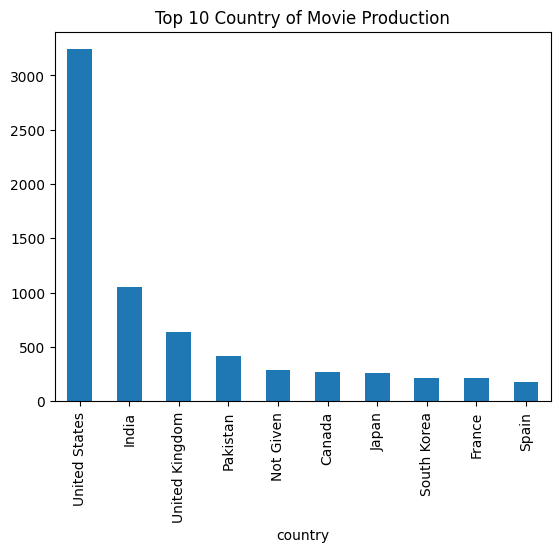

In [19]:
df['country'].value_counts().head(10).plot(kind='bar', title='Top 10 Country of Movie Production')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11212\101797041.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax=sns.barplot(data=df.groupby(["type"])["country"].value_counts().reset_index().sort_values(by="count",ascending=False).head(10),x="country",y="count",hue="type")


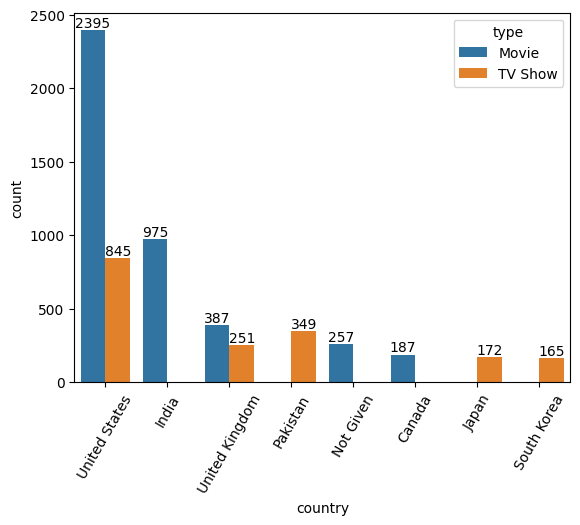

In [20]:
ax=sns.barplot(data=df.groupby(["type"])["country"].value_counts().reset_index().sort_values(by="count",ascending=False).head(10),x="country",y="count",hue="type")
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation=60)
plt.show()

In [21]:
df['release_year'].value_counts()

release_year
2018    1144
2017    1030
2019    1029
2020     953
2016     901
        ... 
1966       1
1959       1
1925       1
1947       1
1961       1
Name: count, Length: 74, dtype: int64

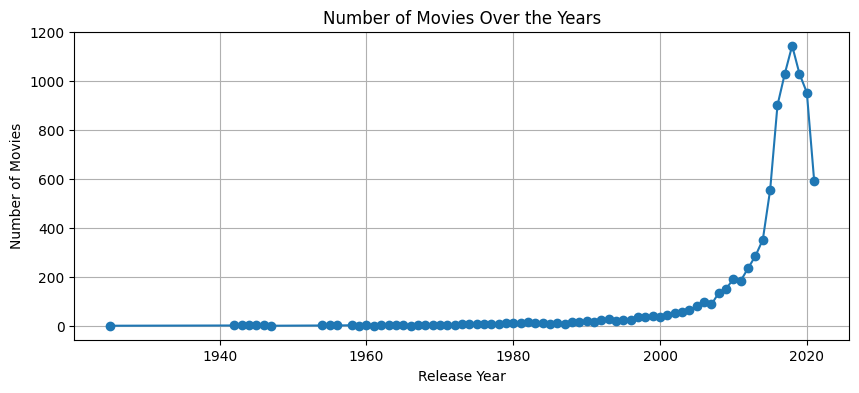

In [22]:
MoviesPerYear = df["release_year"].value_counts().sort_index()
plt.figure(figsize=(10,4))
plt.plot(MoviesPerYear.index,MoviesPerYear.values,marker='o')
plt.title("Number of Movies Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Movies")
plt.grid(True)
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11212\3967409848.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data1 = df.groupby('type').get_group('Movie')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11212\3967409848.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data2=df.groupby('type').get_group('TV Show')


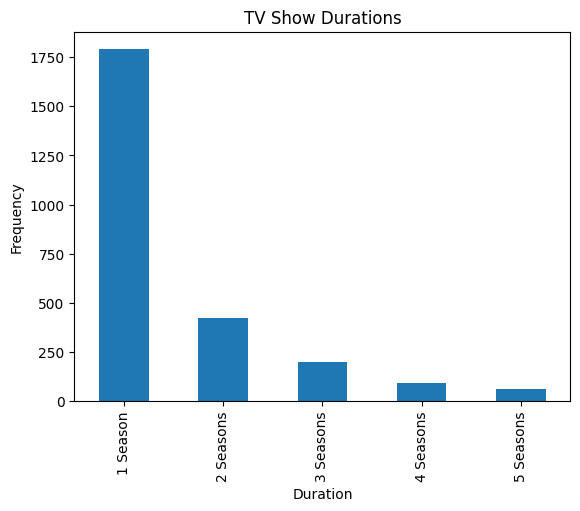

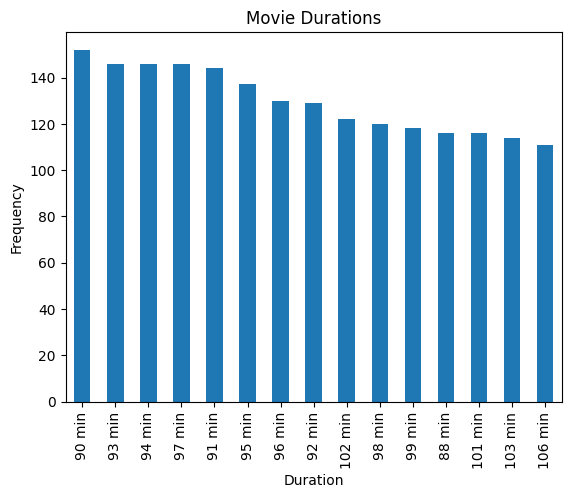

In [23]:
data1 = df.groupby('type').get_group('Movie')
data2=df.groupby('type').get_group('TV Show')
data2['duration'].value_counts().head().plot(kind='bar')
plt.title('TV Show Durations')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

data1['duration'].value_counts().head(15).plot(kind='bar')
plt.title('Movie Durations')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Duration')

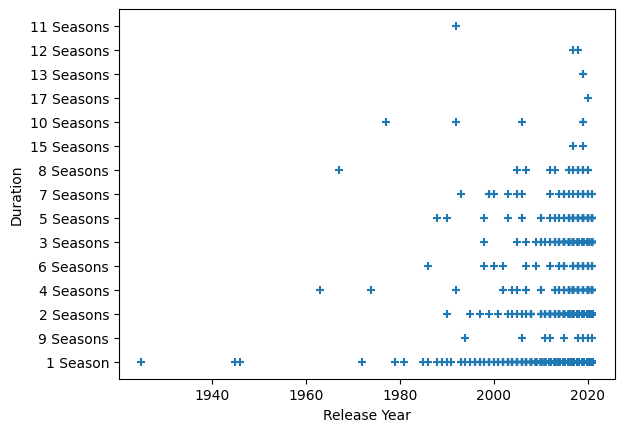

In [24]:
plt.scatter(data2['release_year'], data2['duration'], marker='+')
plt.xlabel('Release Year')
plt.ylabel('Duration')

Text(0.5, 1.0, 'Rating Ratios')

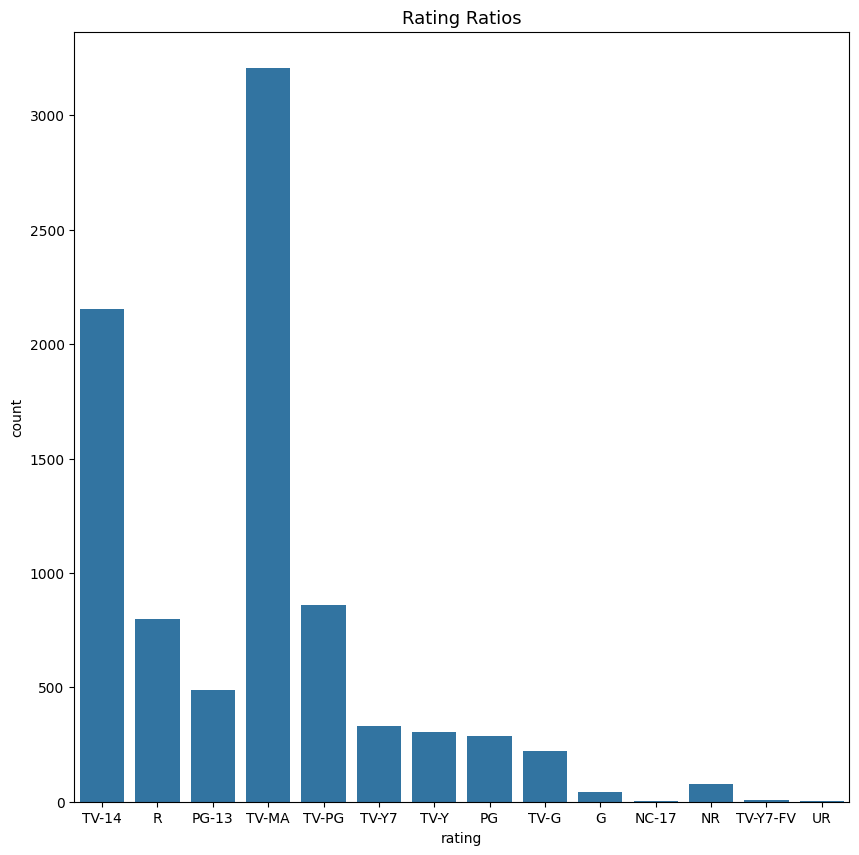

In [25]:
plt.figure(figsize=(10,10))
sns.countplot(x='rating',data=df)
plt.title('Rating Ratios',fontsize=13)

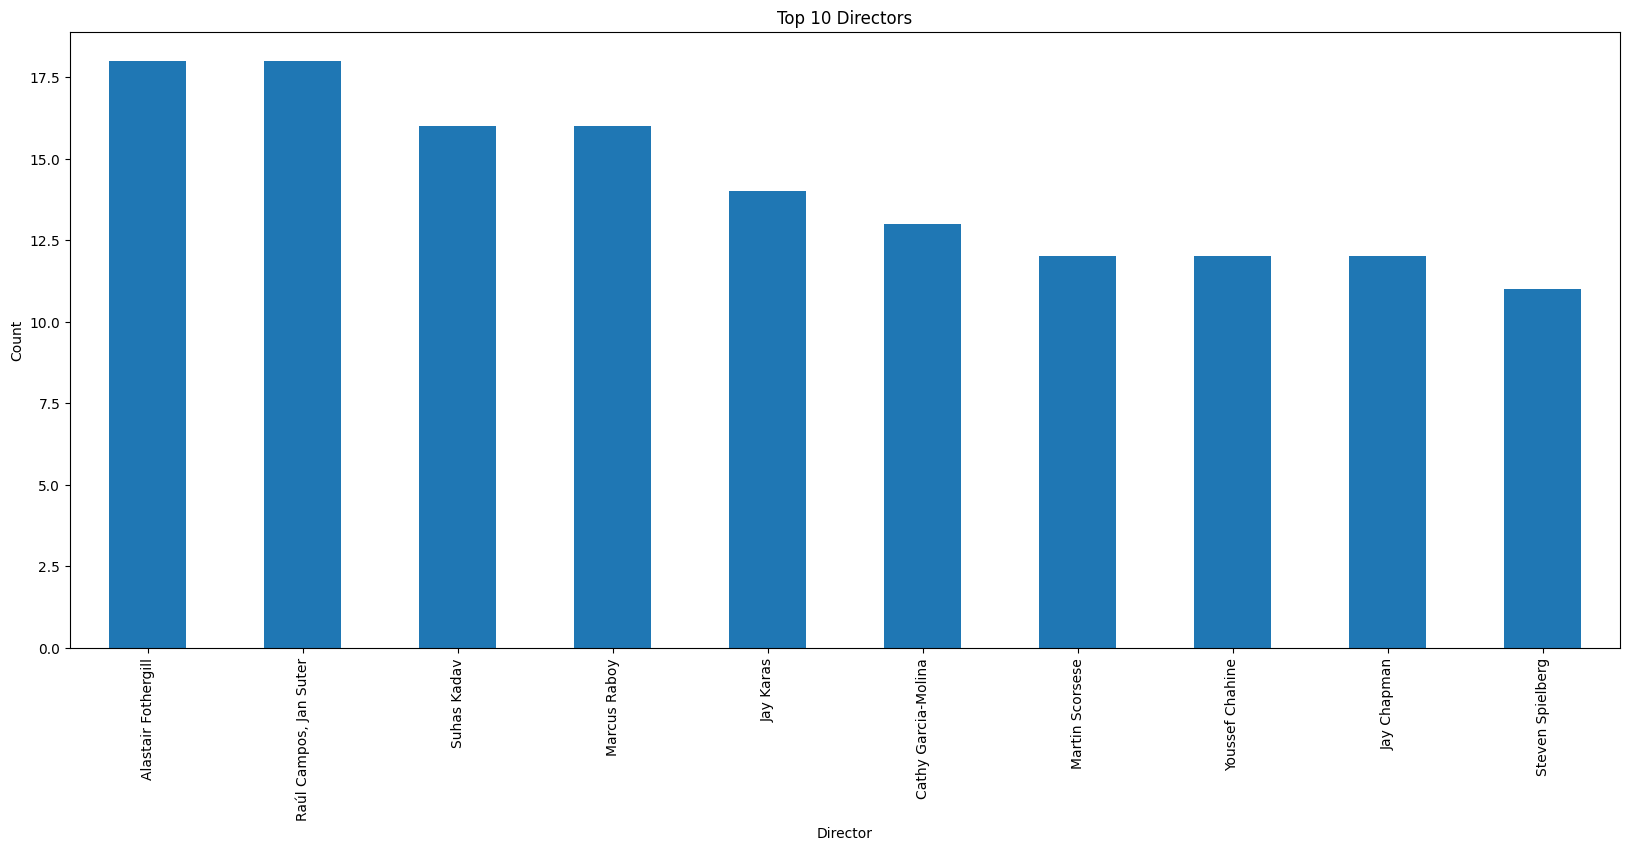

In [26]:
top_10_directors = df.groupby('director')['director'].value_counts().sort_values(ascending=False).iloc[2:12]
plt.figure(figsize=(20, 8))
top_10_directors.plot(x='director', y='count', kind='bar')
plt.title('Top 10 Directors')
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

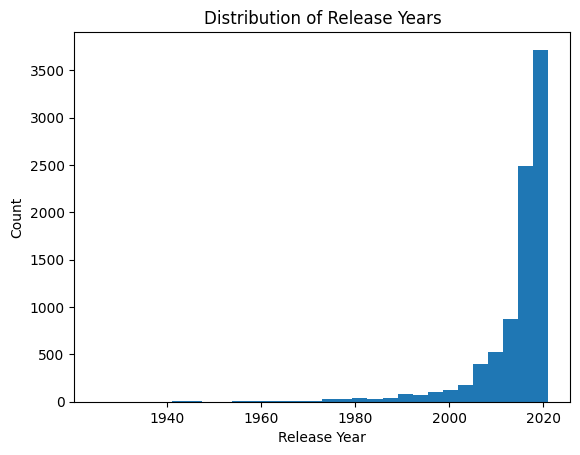

In [27]:
df['release_year'].plot(kind='hist', bins=30)
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

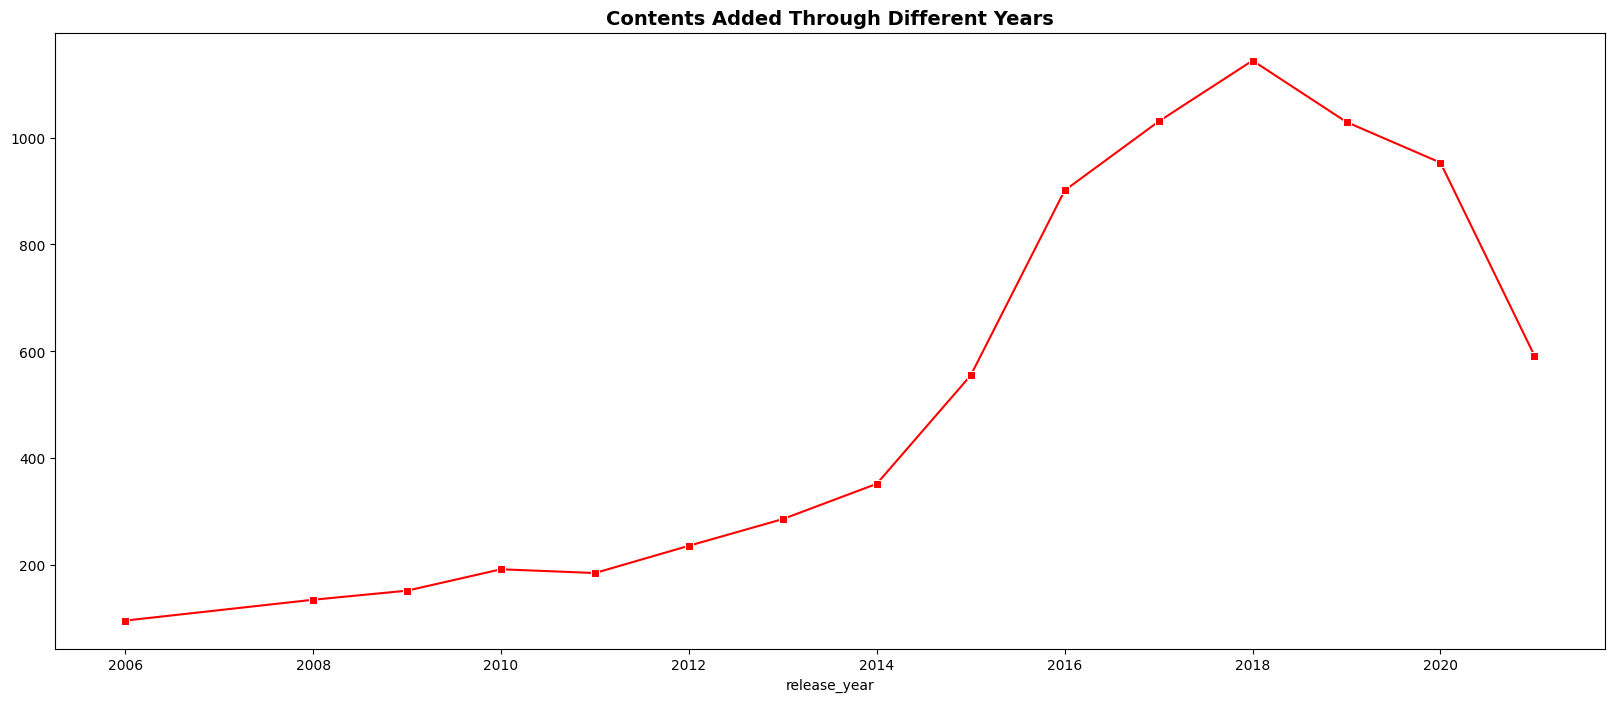

In [28]:
plt.figure(figsize = (20,8))
sns.lineplot(x = df['release_year'].value_counts().head(15).index , y = df['release_year'].value_counts().head(15).values, alpha = 1, color = "red", marker='s')
plt.title('Contents Added Through Different Years', fontsize = 14, fontweight = 'heavy')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11212\897233241.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df["listed_in"].value_counts().head(10).reset_index(), x=df["listed_in"].value_counts().head(10).reset_index()["count"],y=df["listed_in"].value_counts().head(10).reset_index()["listed_in"],palette='Blues_d')


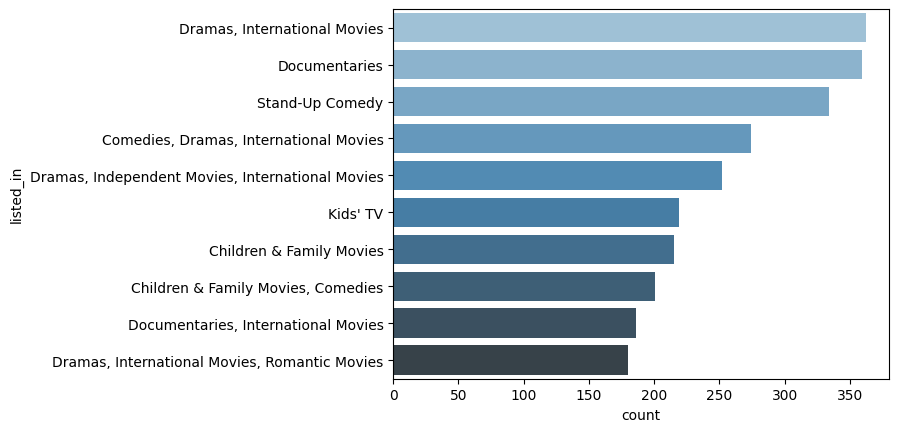

In [29]:
sns.barplot(data=df["listed_in"].value_counts().head(10).reset_index(), x=df["listed_in"].value_counts().head(10).reset_index()["count"],y=df["listed_in"].value_counts().head(10).reset_index()["listed_in"],palette='Blues_d')
plt.show()